### COMP 473 Group Project

#### Facial Expression Recognition: 6-Class Classification

##### Import Libraries


In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classes = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']

#### Training Metrics Graph
Automatically update loss and accuracy of training and validation set and display the graph as the model gets trained

In [2]:
from IPython.display import clear_output


class PlotTrain(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        #To plot the graph
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), self.metrics[metric], label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), self.metrics['val_' + metric], label='val_' + metric)

        axs[i].legend()
        axs[i].grid()
        plt.tight_layout()
        plt.show()

### Sample image from each class

Training_10371709.jpg
Training_6902246.jpg
Training_20688095.jpg
Training_19103156.jpg
Training_3718497.jpg
Training_74563619.jpg
Training_68981394.jpg


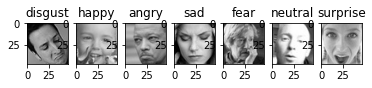

In [3]:
import random
import PIL

path_fer_2013 = '../COMP_473_Project/FER_2013_DataSet/FER_2013/train'

for index, directory_name in enumerate(os.listdir(path_fer_2013)):
    joined_directory = os.path.join(path_fer_2013, directory_name)
    sample_image = random.choice(os.listdir(joined_directory))
    print(sample_image)
    image = PIL.Image.open(os.path.join(joined_directory, sample_image)).convert('I')
    plt.subplot(1, 7, index + 1)
    plt.title(directory_name)
    plt.imshow(image)

In [16]:
import pandas as pd


#load all the data
def get_all_file_paths(path):
    all_filenames = []
    for root, subdirs, files in os.walk(path):
        for name in files:
            absolute_filepath = os.path.join(root, name)
            relative_file_path = os.path.join(os.path.basename(root), name)
            all_filenames.append(relative_file_path)
            # print(name)
    return all_filenames


def get_label(file_name):
    if 'angry' in str(file_name):
        return 0
    if 'disgust' in str(file_name):
        return 1
    if 'fear' in str(file_name):
        return 2
    if 'happy' in str(file_name):
        return 3
    if 'neutral' in str(file_name):
        return 4
    if 'sad' in str(file_name):
        return 5
    if 'surprise' in str(file_name):
        return 6


categories = []

filenames = get_all_file_paths(path_fer_2013)
# use list() to show all the values inside a list
# print(list(filenames))
# randomize the files
random.shuffle(filenames)
for filename in filenames:
    categories.append(get_label(filename))
# print(list(categories))

# join the filename and categories list together

dataframe = pd.DataFrame({
    'filename': filenames,
    'category': categories
})



### Printing of datafram to show matching labels

In [17]:
random.shuffle(filenames)
print(dataframe.head())

                         filename  category
0  surprise/Training_58227009.jpg         6
1      fear/Training_68748817.jpg         2
2      fear/Training_74553971.jpg         2
3      happy/Training_9062090.jpg         3
4     angry/Training_20374852.jpg         0


<AxesSubplot: >

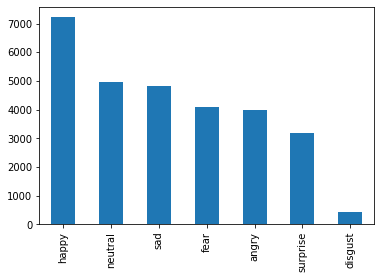

In [19]:
dataframe["category"] = dataframe["category"].replace(
    {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise', })
dataframe['category'].value_counts().plot.bar()

### Load the data

In [4]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

Found 1545 files belonging to 6 classes.


In [5]:
data_iterator = data_CK_Augmented.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

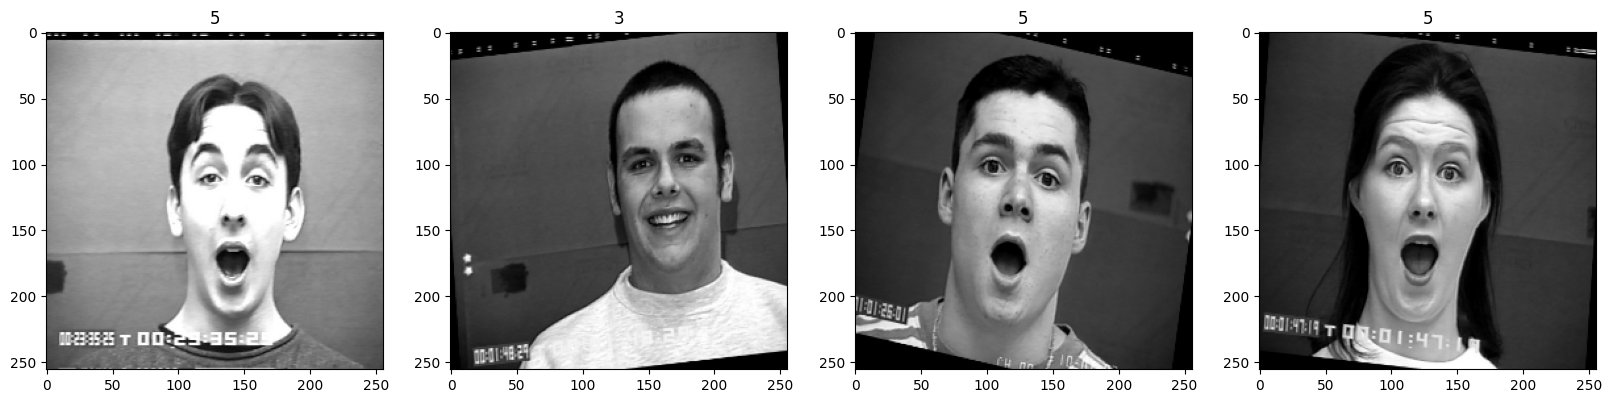

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale the data down


In [8]:
# data_CK_Augmented = data_CK_Augmented.map(lambda x, y: (x / 255, y))

In [9]:
data_CK_Augmented.as_numpy_iterator().next()

(array([[[[4.6165039e+01, 4.6165039e+01, 4.6165039e+01],
          [1.7018652e+02, 1.7018652e+02, 1.7018652e+02],
          [2.4939258e+02, 2.4939258e+02, 2.4939258e+02],
          ...,
          [2.6357422e+00, 2.6357422e+00, 2.6357422e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[2.5000000e-01, 2.5000000e-01, 2.5000000e-01],
          [5.5664062e-01, 5.5664062e-01, 5.5664062e-01],
          [9.4335938e-01, 9.4335938e-01, 9.4335938e-01],
          ...,
          [4.7167969e-01, 4.7167969e-01, 4.7167969e-01],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[4.5710938e+01, 4.5710938e+01, 4.5710938e+01],
          [1.7589648e+02, 1.7589648e+02, 1.7589648e+02],
          [2.5182520e+02, 2.5182520e+02, 2.5182520e+02],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

### Splitting the data

In [10]:
# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train_size: 43
val_size: 10
test_size: 23


In [11]:
train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m1_t1 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

In [12]:
print(train)
print(val)
print(test_m1_t1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [84]:
tf.keras.Sequential??

##### Basic Model
No Pre-Processing Applied

<br>Model1_t1: Trained with Dataset 1

In [13]:
model1_t1 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(6, activation="softmax")
])
model1_t1.build()
# prints summary of our model.
model1_t1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      128       
                                                                 
 resizing (Resizing)         (None, 64, 64, 32)        0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

Compile and Fit(train) the basic models

<br> Model1_t1

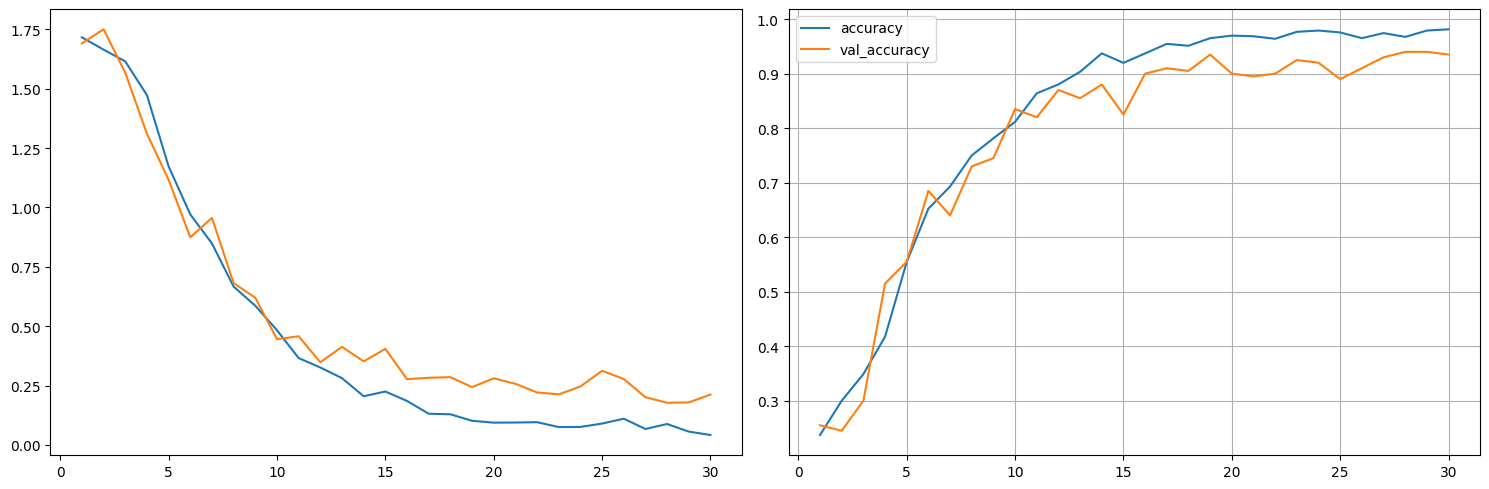

43/43 [==============================] - 7s 170ms/step - loss: 0.0416 - accuracy: 0.9814 - val_loss: 0.2117 - val_accuracy: 0.9350


In [15]:
# compile and fit the model1_t1
callback_list = [PlotTrain()]

model1_t1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model1_t1.fit(train, validation_data=val, epochs=30, callbacks=callback_list)

model1_t1.save("model1_t1.h5")

### Augmented Image cropping model for parameters

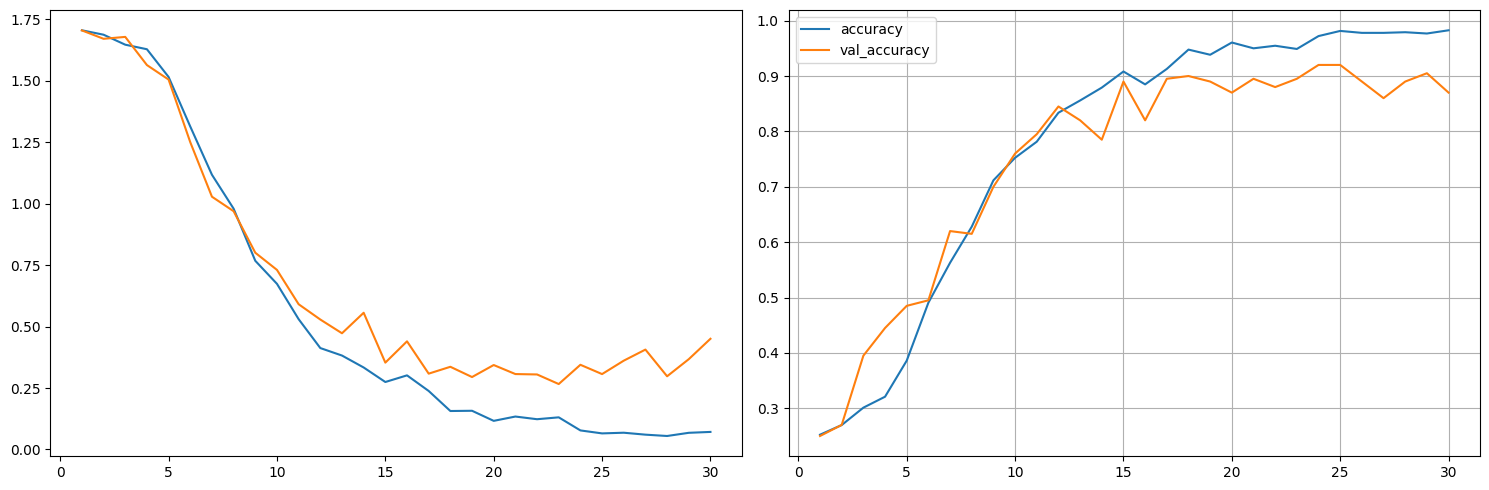

43/43 [==============================] - 7s 165ms/step - loss: 0.0714 - accuracy: 0.9826 - val_loss: 0.4502 - val_accuracy: 0.8700


In [17]:
path_CK_Augmented_ImageCrop = '..\COMP_473_Project\CK_Augmented_ImageCrop'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m2_t1 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model2_t1 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model2_t1.build()
# prints summary of our model.
model2_t1.summary()

# compile and fit the model2_t1
callback_list = [PlotTrain()]

model2_t1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model2_t1.fit(train, validation_data=val, epochs=30, callbacks=callback_list)

model2_t1.save("model2_t1.h5")


### Augmented Intensity Normalization model for parameters


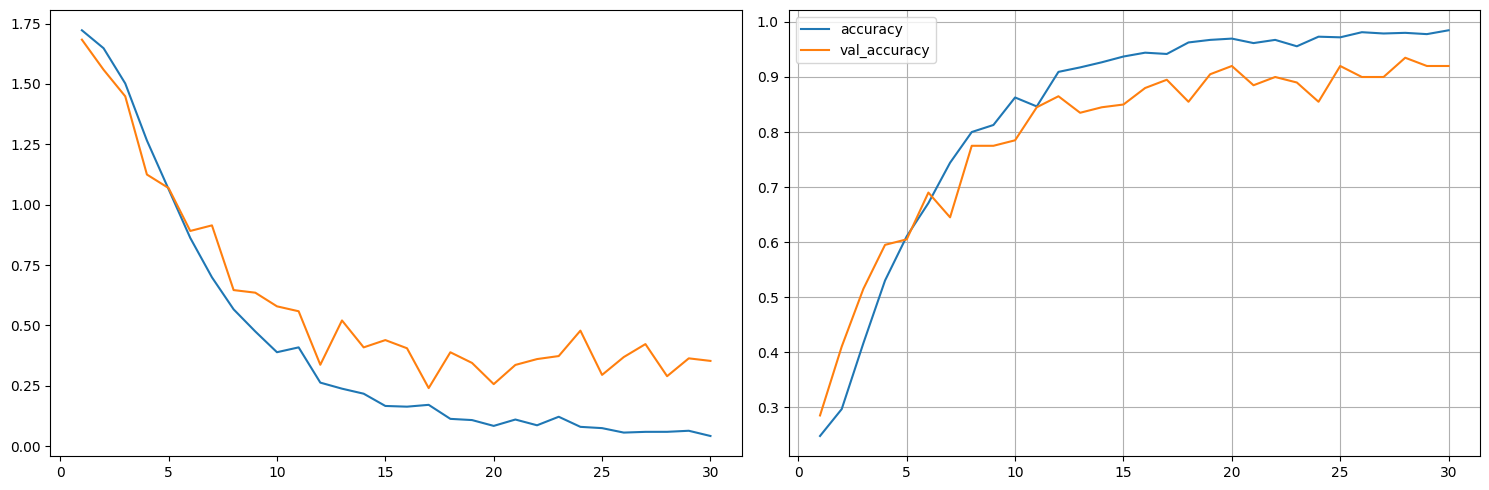

43/43 [==============================] - 18s 420ms/step - loss: 0.0416 - accuracy: 0.9849 - val_loss: 0.3527 - val_accuracy: 0.9200


In [6]:
path_CK_Augmented_IntensityNormalization = '..\COMP_473_Project\CK_Augmented_IntensityNormalization'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m3_t1 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model3_t1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

model3_t1.build()
# prints summary of our model.
model3_t1.summary()

# compile and fit the model3_t1
callback_list = [PlotTrain()]

model3_t1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model3_t1.fit(train, validation_data=val, epochs=30, callbacks=callback_list)

model3_t1.save("model3_t1.h5")

## 10 Epoch runs:

In [10]:
epoch_number = 10

Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      128       
                                                                 
 resizing (Resizing)         (None, 64, 64, 32)        0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14

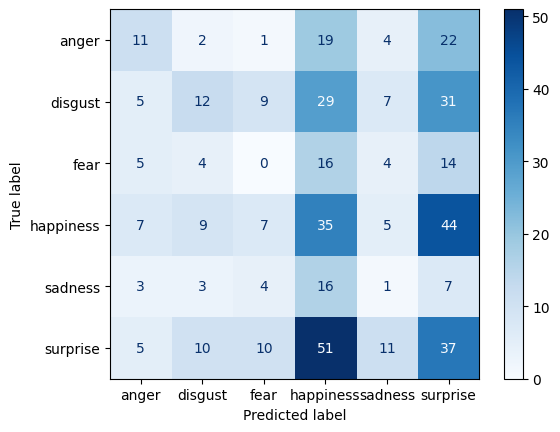

In [5]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    labels='inferred',
    label_mode='categorical'
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m1_t2 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model1_t2 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model1_t2.build()
# prints summary of our model.
model1_t2.summary()
#
# # compile and fit the model1_t2
# callback_list = [PlotTrain()]
#
# model1_t2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model1_t2.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)
#
# model1_t2.save("model1_t2.h5")

# test_dir = 'pathToTestData'

#Fetch testing data from the dataset 1
# test_dir1 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet1-new'
# test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator()
# test_ds1 = test_generator1.flow_from_directory(test_dir1, target_size=(48, 48), batch_size=20, shuffle=False)

#storing actual class associated with each input image with the correct string label
# y_true1 = test_m1_t2.class_names
y_true1 = np.concatenate([y for x, y in test_m1_t2], axis=0)
print(y_true1[0])
true_class1 = []
for i in y_true1:
    # if (i == '1. 0. 0. 0. 0. 0.'):
    #     true_class1 += ['anger']
    # if (i == '0. 1. 0. 0. 0. 0.'):
    #     true_class1 += ['disgust']
    # if (i == '0. 0. 1. 0. 0. 0.'):
    #     true_class1 += ['fear']
    # if (i == '0. 0. 0. 1. 0. 0.'):
    #     true_class1 += ['happy']
    # if (i == '0. 0. 0. 0. 1. 0.'):
    #     true_class1 += ['sadness']
    # if (i == '0. 0. 0. 0. 0. 1.'):
    #     true_class1 += ['surprise']
    if (i[0] == 1):
        true_class1 += ['anger']
    if (i[1] == 1):
        true_class1 += ['disgust']
    if (i[2] == 1):
        true_class1 += ['fear']
    if (i[3] == 1):
        true_class1 += ['happiness']
    if (i[4] == 1):
        true_class1 += ['sadness']
    if (i[5] == 1):
        true_class1 += ['surprise']

# #predict the category with the input images from the test set
model1_t2.load_weights('model1_t2.h5')
y_predict1 = model1_t2.predict(test_m1_t2)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['disgust']
    if (i == 2):
        predicted_class1 += ['fear']
    if (i == 3):
        predicted_class1 += ['happiness']
    if (i == 4):
        predicted_class1 += ['sadness']
    if (i == 5):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))

# predictions = np.array([])
# labels =  np.array([])
# for x, y in test_m1_t2:
#   predictions = np.concatenate([predictions, model1_t2.predict(x)])
#   labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

# tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

cf_model1 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model1, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      128       
                                                                 
 resizing_1 (Resizing)       (None, 64, 64, 32)        0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 

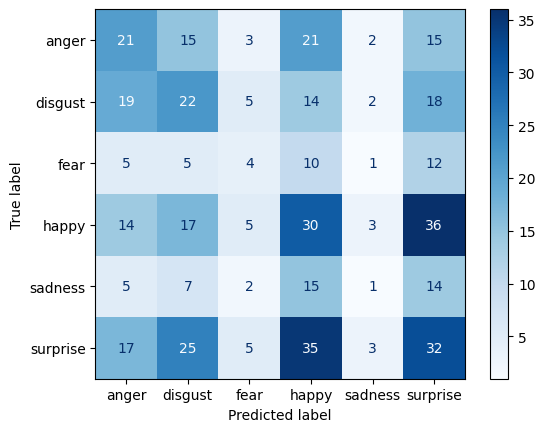

In [4]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_ImageCrop'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m2_t2 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model2_t2 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model2_t2.build()
# prints summary of our model.
model2_t2.summary()

# # compile and fit the model2_t2
# callback_list = [PlotTrain()]

# model2_t2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model2_t2.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

# model2_t2.save("model2_t2.h5")


# # compile and fit the model1_t2
# callback_list = [PlotTrain()]
#
# model1_t2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model1_t2.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)
#
# model1_t2.save("model1_t2.h5")

# test_dir = 'pathToTestData'

#Fetch testing data from the dataset 1
# test_dir1 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet1-new'
# test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator()
# test_ds1 = test_generator1.flow_from_directory(test_dir1, target_size=(48, 48), batch_size=20, shuffle=False)

#storing actual class associated with each input image with the correct string label
# y_true1 = test_m1_t2.class_names
y_true1 = np.concatenate([y for x, y in test_m2_t2], axis=0)
print(y_true1[0])
true_class1 = []
for i in y_true1:
    if (i == 0):
        true_class1 += ['anger']
    if (i == 1):
        true_class1 += ['disgust']
    if (i == 2):
        true_class1 += ['fear']
    if (i == 3):
        true_class1 += ['happy']
    if (i == 4):
        true_class1 += ['sadness']
    if (i == 5):
        true_class1 += ['surprise']

# #predict the category with the input images from the test set
model2_t2.load_weights('model2_t2.h5')
y_predict1 = model2_t2.predict(test_m2_t2)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['disgust']
    if (i == 2):
        predicted_class1 += ['fear']
    if (i == 3):
        predicted_class1 += ['happy']
    if (i == 4):
        predicted_class1 += ['sadness']
    if (i == 5):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))

# predictions = np.array([])
# labels =  np.array([])
# for x, y in test_m1_t2:
#   predictions = np.concatenate([predictions, model1_t2.predict(x)])
#   labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

# tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

cf_model2 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model2, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Image Cropping Training and Testing


In [23]:
#Dataset 1
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_ImageCrop2'

data_CK_Augmented1 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train1_size = int(len(data_CK_Augmented1) * .56)
test1_size = int(len(data_CK_Augmented1) * .3)

# We then split the training data 80% for training and 20% for validation
val1_size = int(len(data_CK_Augmented1) * .14)
print('train_size: {}'.format(train1_size))
print('val_size: {}'.format(val1_size))
print('test_size: {}'.format(test1_size))

train1 = data_CK_Augmented1.take(train1_size)
val1 = data_CK_Augmented1.skip(train1_size).take(val1_size)
test_crop_1 = data_CK_Augmented1.skip(train1_size + val_size).take(test1_size)

#Dataset 2
data_CK_Augmented2 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train2_size = int(len(data_CK_Augmented2) * .56)
test2_size = int(len(data_CK_Augmented2) * .3)

# We then split the training data 80% for training and 20% for validation
val2_size = int(len(data_CK_Augmented2) * .14)
print('train_size: {}'.format(train2_size))
print('val_size: {}'.format(val2_size))
print('test_size: {}'.format(test2_size))

train2 = data_CK_Augmented2.take(train2_size)
val2 = data_CK_Augmented2.skip(train2_size).take(val2_size)
test_crop_2 = data_CK_Augmented1.skip(train2_size + val2_size).take(test2_size)

#Dataset 3
data_CK_Augmented3 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train3_size = int(len(data_CK_Augmented3) * .56)
test3_size = int(len(data_CK_Augmented3) * .3)

# We then split the training data 80% for training and 20% for validation
val3_size = int(len(data_CK_Augmented3) * .14)
print('train_size: {}'.format(train3_size))
print('val_size: {}'.format(val3_size))
print('test_size: {}'.format(test3_size))

train3 = data_CK_Augmented3.take(train3_size)
val3 = data_CK_Augmented2.skip(train3_size).take(val3_size)
test_crop_3 = data_CK_Augmented1.skip(train3_size + val3_size).take(test3_size)

Found 1545 files belonging to 3 classes.
train_size: 43
val_size: 10
test_size: 23
Found 1545 files belonging to 3 classes.
train_size: 43
val_size: 10
test_size: 23
Found 1545 files belonging to 3 classes.
train_size: 43
val_size: 10
test_size: 23


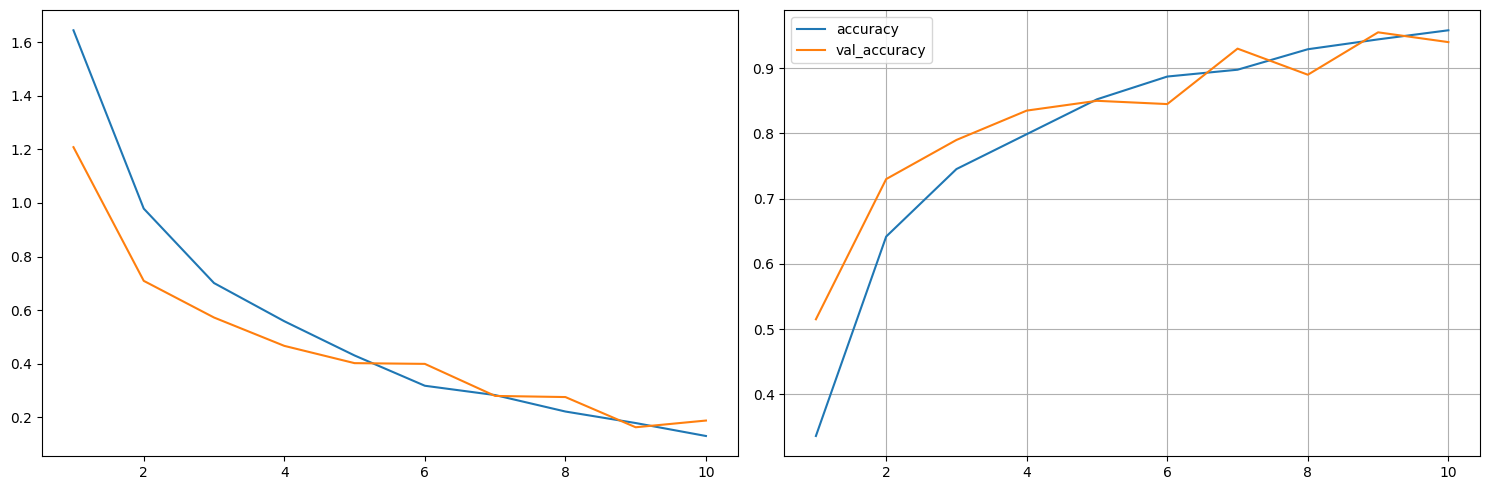

23/23 [==============================] - 3s 109ms/step
              precision    recall  f1-score   support

       anger       0.09      0.09      0.09        55
     disgust       0.14      0.15      0.14        86
        fear       0.11      0.10      0.11        39
   happiness       0.19      0.19      0.19        98
     sadness       0.03      0.03      0.03        40
    surprise       0.31      0.30      0.31       142

    accuracy                           0.18       460
   macro avg       0.15      0.14      0.14       460
weighted avg       0.19      0.18      0.19       460



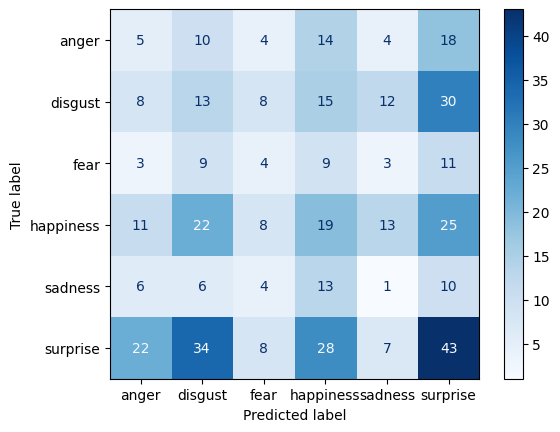

In [20]:
model_crop_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_crop_1.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_crop_1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_crop_1.fit(train1, validation_data=val1, epochs=epoch_number, callbacks=callback_list)
model_crop_1.save("model_inten_1.h5")

y_true1 = np.concatenate([y for x, y in test_crop_1], axis=0)
true_class1 = []
for i in y_true1:
    if (i == 0):
        true_class1 += ['anger']
    if (i == 1):
        true_class1 += ['disgust']
    if (i == 2):
        true_class1 += ['fear']
    if (i == 3):
        true_class1 += ['happiness']
    if (i == 4):
        true_class1 += ['sadness']
    if (i == 5):
        true_class1 += ['surprise']

# #predict the category with the input images from the test set
y_predict1 = model_crop_1.predict(test_crop_1)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['disgust']
    if (i == 2):
        predicted_class1 += ['fear']
    if (i == 3):
        predicted_class1 += ['happiness']
    if (i == 4):
        predicted_class1 += ['sadness']
    if (i == 5):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))
cf_model3 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## THE CORRECT CODE

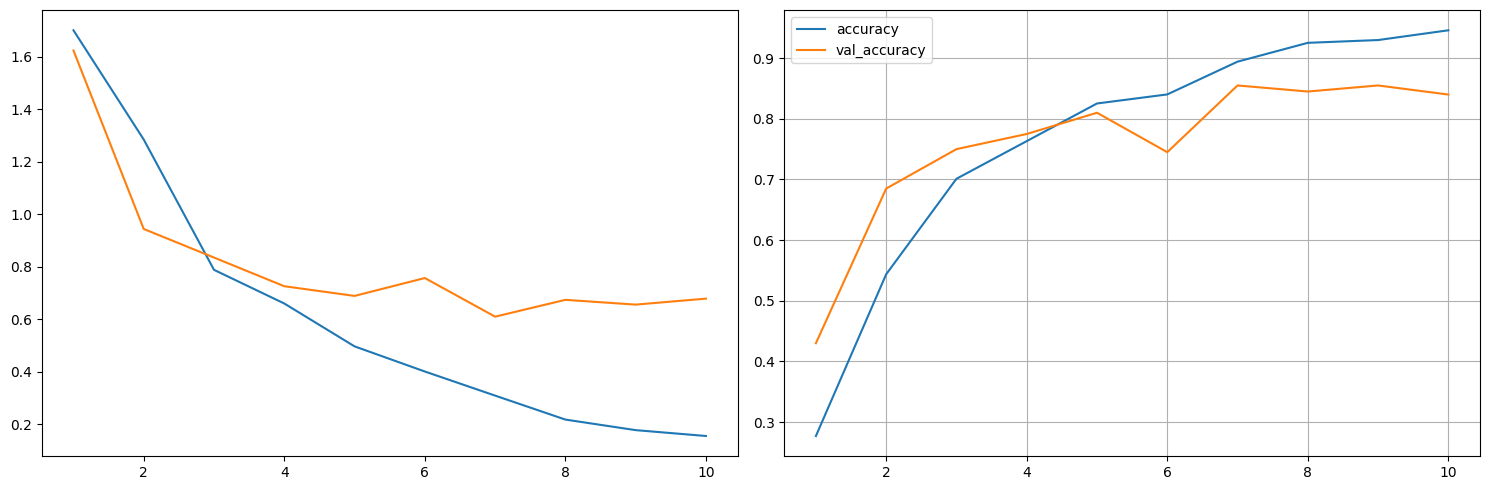

24/24 [==============================] - 3s 118ms/step
              precision    recall  f1-score   support

       anger       0.70      0.79      0.74        70
     disgust       0.85      0.92      0.88        90
        fear       0.77      0.57      0.66        40
   happiness       0.93      0.94      0.93       105
     sadness       0.73      0.49      0.59        45
    surprise       0.89      0.94      0.91       125

    accuracy                           0.84       475
   macro avg       0.81      0.78      0.79       475
weighted avg       0.84      0.84      0.83       475



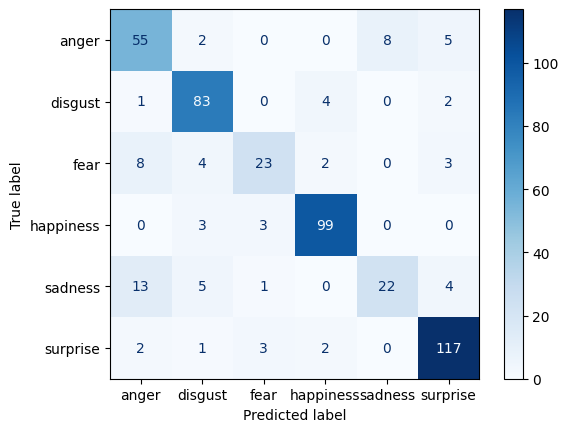

In [25]:
# get training and validation data on dataset 3
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\TrainSet',
    image_size=(256, 256),
    batch_size=20
)

val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\ValSet',
    image_size=(256, 256),
    batch_size=20
)

#Fetch testing data from the dataset 1
test_dir2 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\TestSet'
test_generator2 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds2 = test_generator2.flow_from_directory(test_dir2, target_size=(256, 256), batch_size=20, shuffle=False)

model_crop_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_crop_2.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_crop_2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_crop_2.fit(train_ds2, validation_data=val_ds2, epochs=epoch_number, callbacks=callback_list)
model_crop_2.save("model_inten_1.h5")

y_true1 = test_ds2.classes
true_class1 = []
for i in y_true1:
    if (i == 0):
        true_class1 += ['anger']
    if (i == 1):
        true_class1 += ['disgust']
    if (i == 2):
        true_class1 += ['fear']
    if (i == 3):
        true_class1 += ['happiness']
    if (i == 4):
        true_class1 += ['sadness']
    if (i == 5):
        true_class1 += ['surprise']

# #predict the category with the input images from the test set
y_predict1 = model_crop_2.predict(test_ds2)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['disgust']
    if (i == 2):
        predicted_class1 += ['fear']
    if (i == 3):
        predicted_class1 += ['happiness']
    if (i == 4):
        predicted_class1 += ['sadness']
    if (i == 5):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))
cf_model2 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model2, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### END CORRECT CODE

In [22]:
print(classification_report(y_true1, classes_x1))
cf_model3 = confusion_matrix(y_true1, classes_x1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

              precision    recall  f1-score   support

           0       0.09      0.09      0.09        55
           1       0.14      0.15      0.14        86
           2       0.11      0.10      0.11        39
           3       0.19      0.19      0.19        98
           4       0.03      0.03      0.03        40
           5       0.31      0.30      0.31       142

    accuracy                           0.18       460
   macro avg       0.15      0.14      0.14       460
weighted avg       0.19      0.18      0.19       460



ValueError: At least one label specified must be in y_true

#### Intensity Normalization Training and Testing



In [7]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model3.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      128       
                                                                 
 resizing_2 (Resizing)       (None, 64, 64, 32)        0         
                                                                 
 rescaling_2 (Rescaling)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [16]:
#Dataset 1
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_IntensityNormalization'

data_CK_Augmented1 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train1_size = int(len(data_CK_Augmented1) * .56)
test1_size = int(len(data_CK_Augmented1) * .3)

# We then split the training data 80% for training and 20% for validation
val1_size = int(len(data_CK_Augmented1) * .14)
print('train_size: {}'.format(train1_size))
print('val_size: {}'.format(val1_size))
print('test_size: {}'.format(test1_size))

train1 = data_CK_Augmented1.take(train1_size)
val1 = data_CK_Augmented1.skip(train1_size).take(val1_size)
test_inten_1 = data_CK_Augmented1.skip(train1_size + val_size).take(test1_size)

#Dataset 2
data_CK_Augmented2 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train2_size = int(len(data_CK_Augmented2) * .56)
test2_size = int(len(data_CK_Augmented2) * .3)

# We then split the training data 80% for training and 20% for validation
val2_size = int(len(data_CK_Augmented2) * .14)
print('train_size: {}'.format(train2_size))
print('val_size: {}'.format(val2_size))
print('test_size: {}'.format(test2_size))

train2 = data_CK_Augmented2.take(train2_size)
val2 = data_CK_Augmented2.skip(train2_size).take(val2_size)
test_inten_2 = data_CK_Augmented1.skip(train2_size + val2_size).take(test2_size)

#Dataset 3
data_CK_Augmented3 = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train3_size = int(len(data_CK_Augmented3) * .56)
test3_size = int(len(data_CK_Augmented3) * .3)

# We then split the training data 80% for training and 20% for validation
val3_size = int(len(data_CK_Augmented3) * .14)
print('train_size: {}'.format(train3_size))
print('val_size: {}'.format(val3_size))
print('test_size: {}'.format(test3_size))

train3 = data_CK_Augmented3.take(train3_size)
val3 = data_CK_Augmented2.skip(train3_size).take(val3_size)
test_inten_3 = data_CK_Augmented1.skip(train3_size + val3_size).take(test3_size)

Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23
Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23
Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23


Model3 Dataset 1

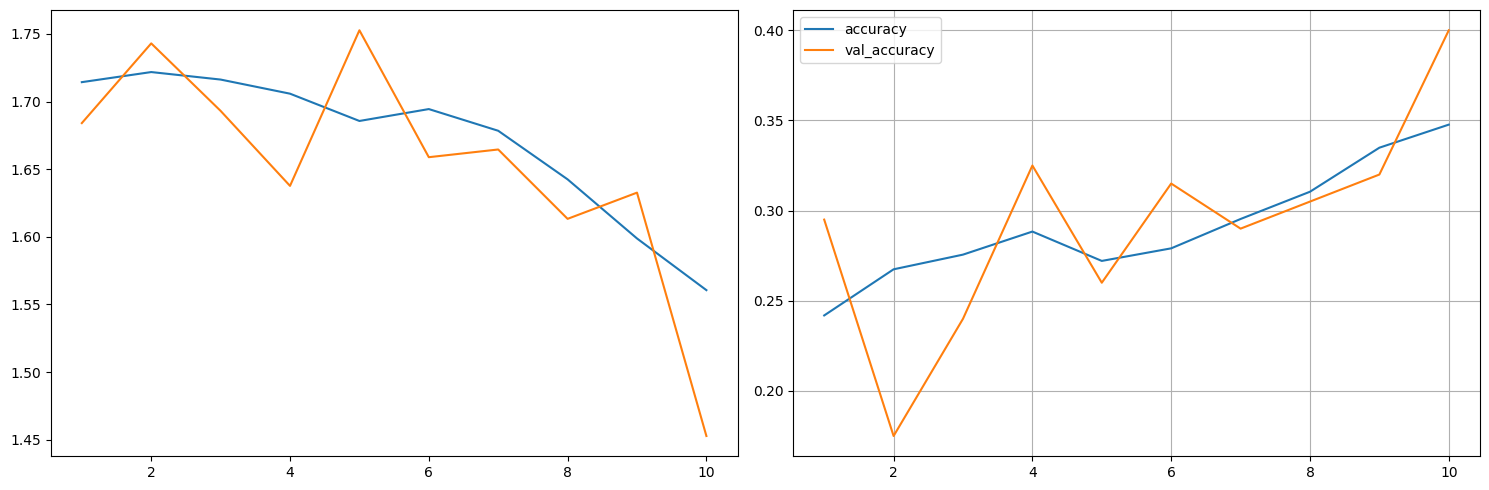

23/23 [==============================] - 4s 112ms/step
              precision    recall  f1-score   support

       anger       0.06      0.06      0.06        68
     disgust       0.00      0.00      0.00        86
        fear       0.00      0.00      0.00        37
   happiness       0.25      0.44      0.32       111
     sadness       0.00      0.00      0.00        40
    surprise       0.32      0.53      0.40       118

    accuracy                           0.25       460
   macro avg       0.11      0.17      0.13       460
weighted avg       0.15      0.25      0.19       460



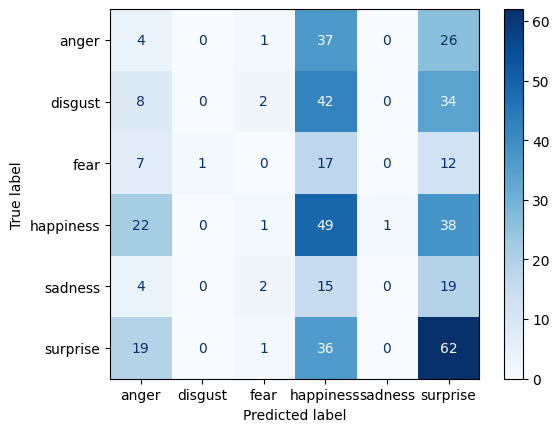

In [17]:
model_inten_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_inten_1.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_inten_1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_inten_1.fit(train1, validation_data=val1, epochs=epoch_number, callbacks=callback_list)
model_inten_1.save("model_inten_1.h5")

y_true1 = np.concatenate([y for x, y in test_inten_1], axis=0)
true_class1 = []
for i in y_true1:
    if (i == 0):
        true_class1 += ['anger']
    if (i == 1):
        true_class1 += ['disgust']
    if (i == 2):
        true_class1 += ['fear']
    if (i == 3):
        true_class1 += ['happiness']
    if (i == 4):
        true_class1 += ['sadness']
    if (i == 5):
        true_class1 += ['surprise']

# #predict the category with the input images from the test set
y_predict1 = model_inten_1.predict(test_inten_1)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['disgust']
    if (i == 2):
        predicted_class1 += ['fear']
    if (i == 3):
        predicted_class1 += ['happiness']
    if (i == 4):
        predicted_class1 += ['sadness']
    if (i == 5):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))
cf_model3 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model3 Dataset 2

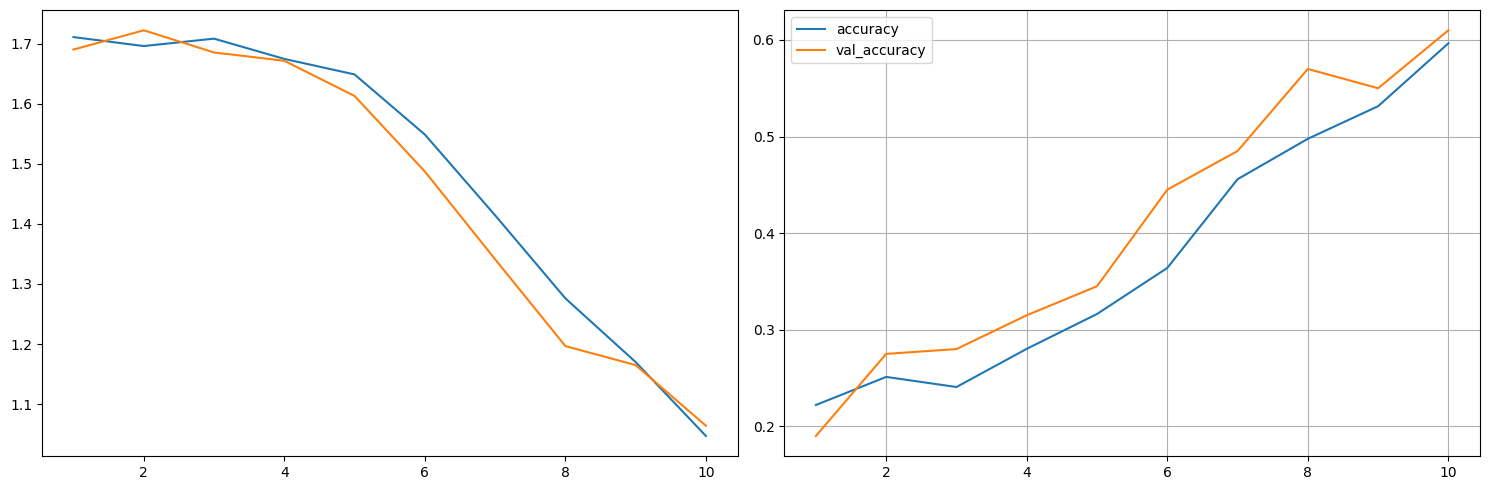

23/23 [==============================] - 4s 113ms/step
              precision    recall  f1-score   support

       anger       0.23      0.19      0.21        68
     disgust       0.20      0.17      0.18        88
        fear       0.03      0.03      0.03        39
   happiness       0.26      0.34      0.30       109
     sadness       0.00      0.00      0.00        30
    surprise       0.25      0.25      0.25       126

    accuracy                           0.21       460
   macro avg       0.16      0.16      0.16       460
weighted avg       0.21      0.21      0.21       460



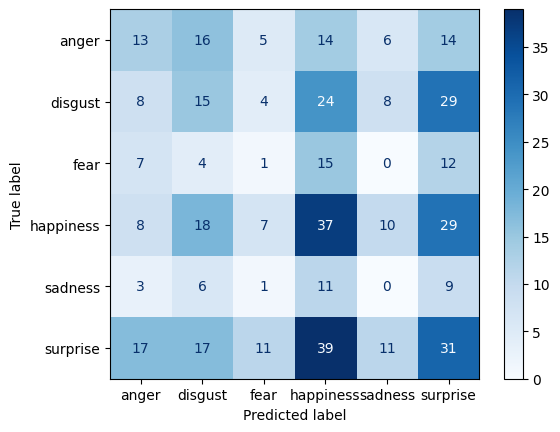

In [18]:
model_inten_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_inten_2.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_inten_2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_inten_2.fit(train2, validation_data=val2, epochs=epoch_number, callbacks=callback_list)
model_inten_2.save("model_inten_2.h5")

y_true2 = np.concatenate([y for x, y in test_inten_2], axis=0)
true_class2 = []
for i in y_true2:
    if (i == 0):
        true_class2 += ['anger']
    if (i == 1):
        true_class2 += ['disgust']
    if (i == 2):
        true_class2 += ['fear']
    if (i == 3):
        true_class2 += ['happiness']
    if (i == 4):
        true_class2 += ['sadness']
    if (i == 5):
        true_class2 += ['surprise']

# #predict the category with the input images from the test set
y_predict2 = model_inten_2.predict(test_inten_2)
classes_x2 = np.argmax(y_predict2, axis=1)

#change the class labels to string
predicted_class2 = []
for i in classes_x2:
    if (i == 0):
        predicted_class2 += ['anger']
    if (i == 1):
        predicted_class2 += ['disgust']
    if (i == 2):
        predicted_class2 += ['fear']
    if (i == 3):
        predicted_class2 += ['happiness']
    if (i == 4):
        predicted_class2 += ['sadness']
    if (i == 5):
        predicted_class2 += ['surprise']

print(classification_report(true_class2, predicted_class2))
cf_model3 = confusion_matrix(true_class2, predicted_class2, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Test Run 3 with 10 epochs:

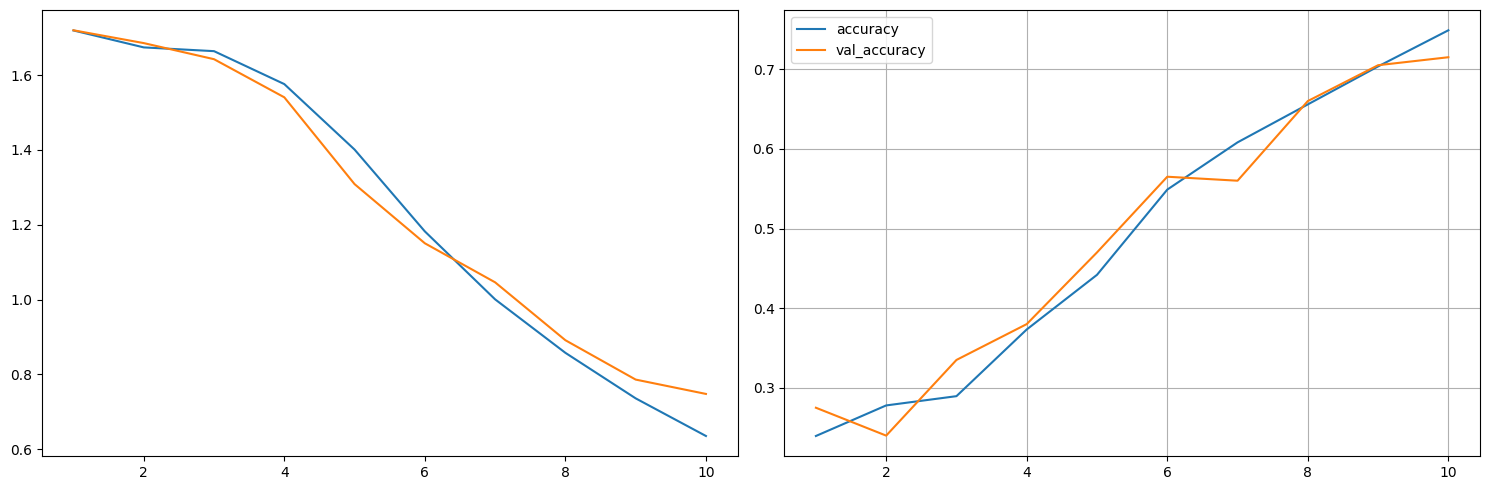

43/43 [==============================] - 7s 171ms/step - loss: 0.6349 - accuracy: 0.7488 - val_loss: 0.7474 - val_accuracy: 0.7150


In [27]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m1_t3 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model1_t3 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model1_t3.build()
# prints summary of our model.
model1_t3.summary()

# compile and fit the model1_t3
callback_list = [PlotTrain()]

model1_t3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model1_t3.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

model1_t3.save("model1_t3.h5")

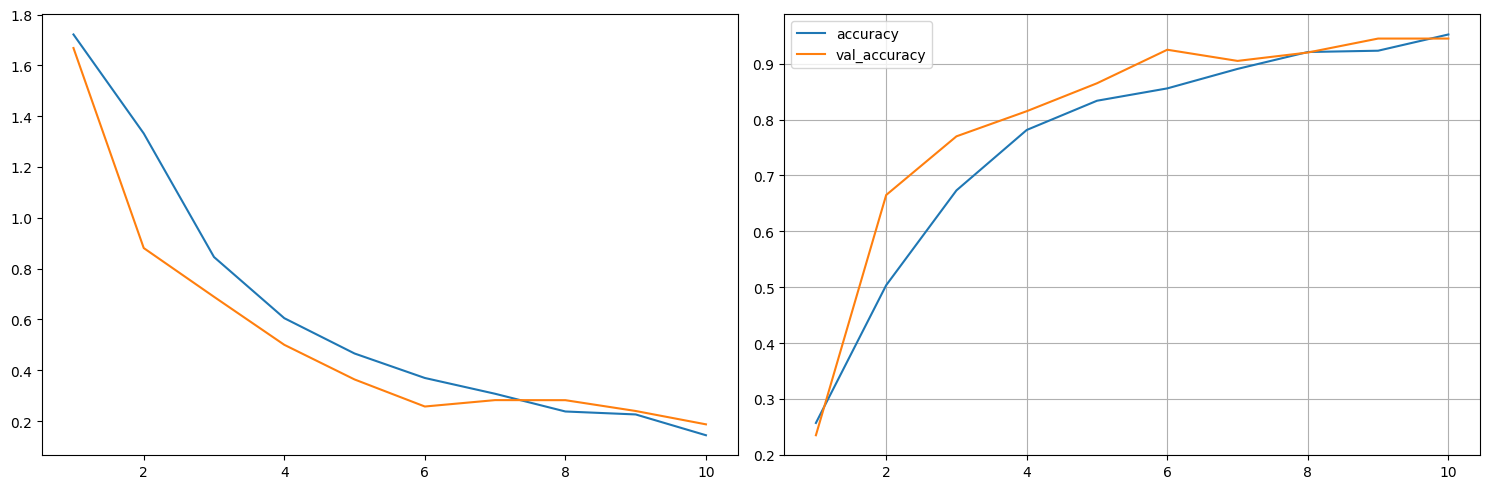

43/43 [==============================] - 7s 163ms/step - loss: 0.1442 - accuracy: 0.9523 - val_loss: 0.1871 - val_accuracy: 0.9450


In [28]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_ImageCrop'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m2_t3 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model2_t3 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model2_t3.build()
# prints summary of our model.
model2_t3.summary()

# compile and fit the model2_t3
callback_list = [PlotTrain()]

model2_t3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model2_t3.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

model2_t3.save("model2_t3.h5")

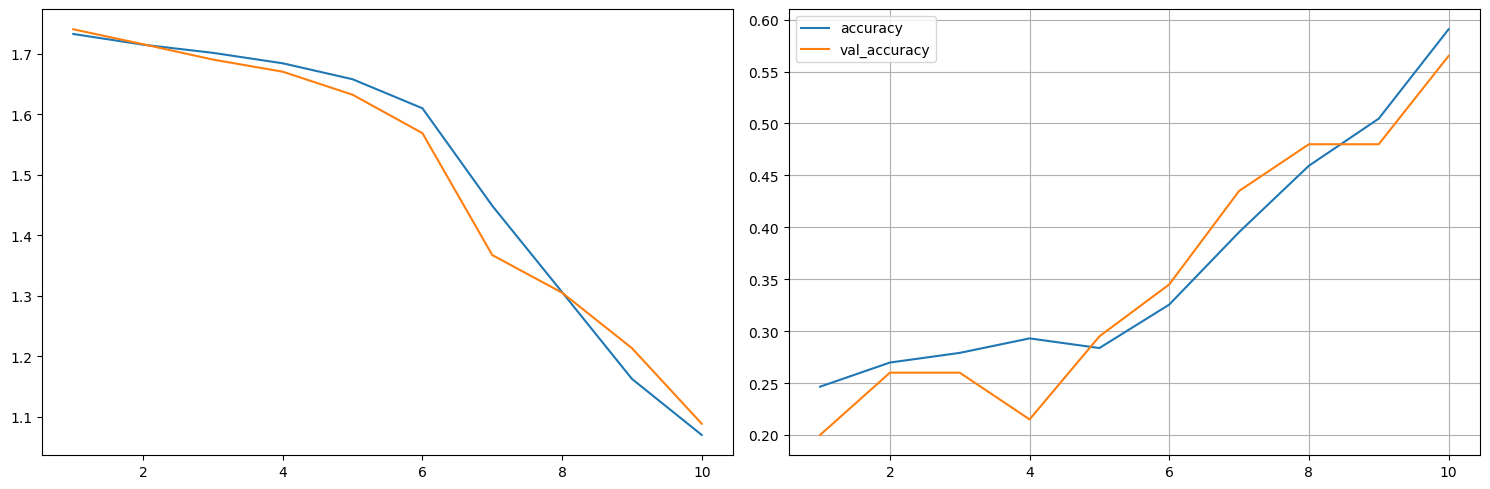

43/43 [==============================] - 7s 170ms/step - loss: 1.0697 - accuracy: 0.5907 - val_loss: 1.0883 - val_accuracy: 0.5650


In [29]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_IntensityNormalization'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m3_t3 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model3_t3 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model3_t3.build()
# prints summary of our model.
model3_t3.summary()

# compile and fit the model3_t3
callback_list = [PlotTrain()]

model3_t3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model3_t3.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

model3_t3.save("model3_t3.h5")

## Test run 4 with 10 epochs:

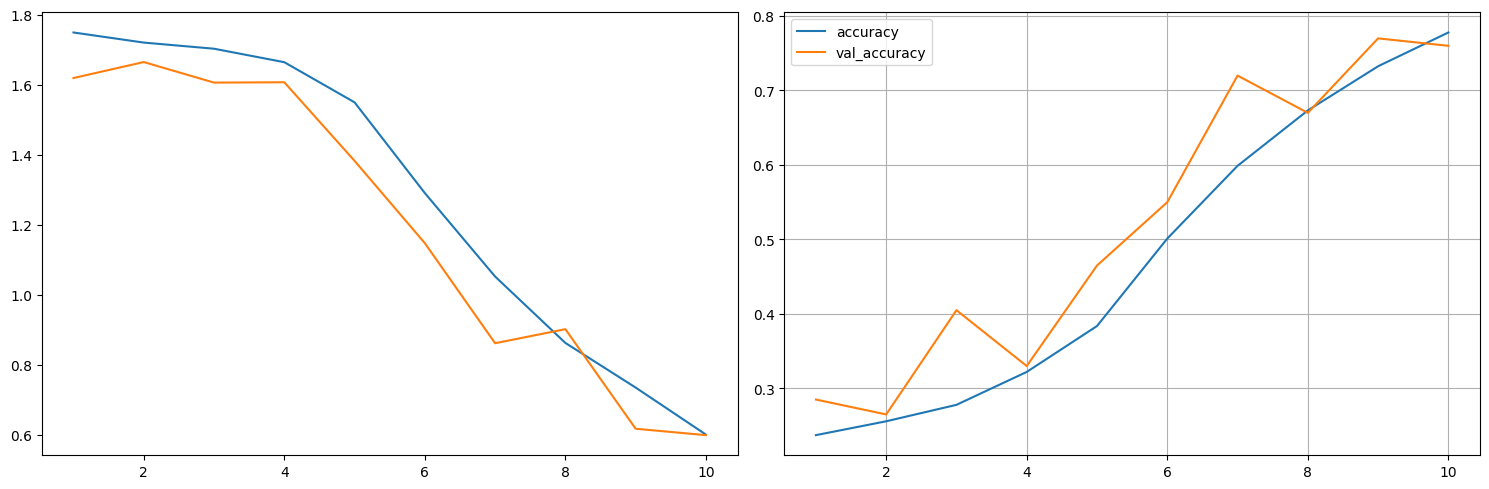

43/43 [==============================] - 7s 166ms/step - loss: 0.6019 - accuracy: 0.7779 - val_loss: 0.6004 - val_accuracy: 0.7600


In [33]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m1_t4 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model1_t4 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model1_t4.build()
# prints summary of our model.
model1_t4.summary()

# compile and fit the model1_t4
callback_list = [PlotTrain()]

model1_t4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model1_t4.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

model1_t4.save("model1_t4.h5")

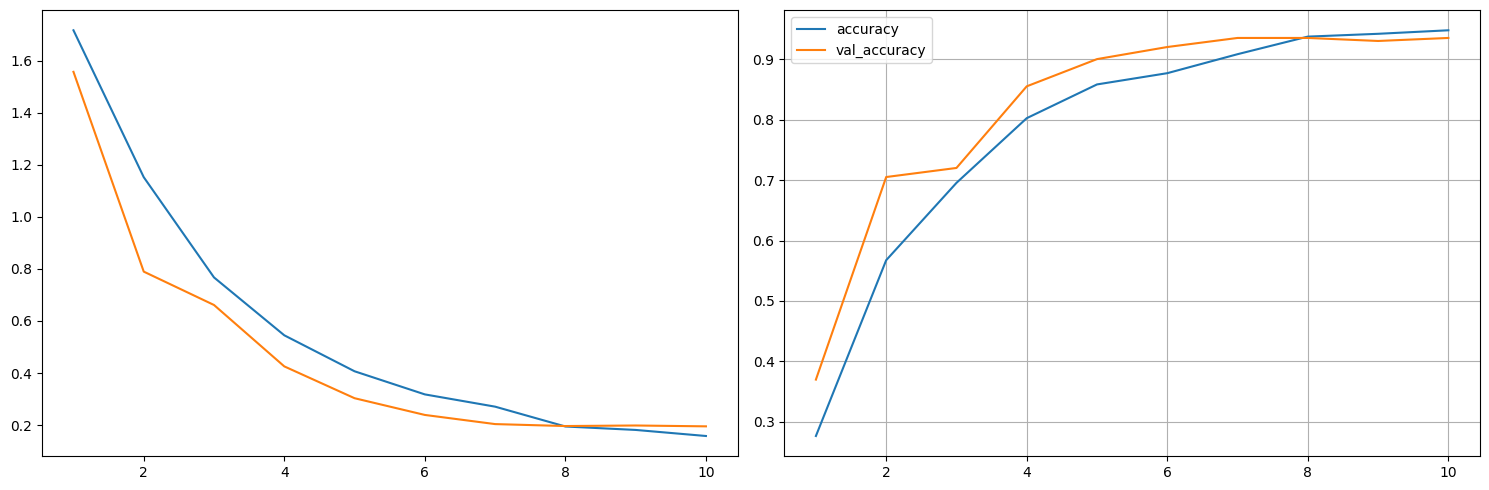

43/43 [==============================] - 7s 166ms/step - loss: 0.1582 - accuracy: 0.9477 - val_loss: 0.1953 - val_accuracy: 0.9350


In [34]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_ImageCrop'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m2_t4 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

model2_t4 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model2_t4.build()
# prints summary of our model.
model2_t4.summary()

# compile and fit the model2_t4
callback_list = [PlotTrain()]

model2_t4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model2_t4.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)

model2_t4.save("model2_t4.h5")

In [43]:
path_CK_Augmented = '..\COMP_473_Project\CK_Augmented_IntensityNormalization'

data_CK_Augmented = tf.keras.utils.image_dataset_from_directory(
    path_CK_Augmented,
    image_size=(256, 256),
    batch_size=20,
    # color_mode='grayscale'
)

# train_size = int(len(data)*.7)
# Split the train and test data 70 and 30 % respectively
train_size = int(len(data_CK_Augmented) * .56)
test_size = int(len(data_CK_Augmented) * .3)

# We then split the training data 80% for training and 20% for validation
val_size = int(len(data_CK_Augmented) * .14)
print('train_size: {}'.format(train_size))
print('val_size: {}'.format(val_size))
print('test_size: {}'.format(test_size))

train = data_CK_Augmented.take(train_size)
val = data_CK_Augmented.skip(train_size).take(val_size)
test_m3_t4 = data_CK_Augmented.skip(train_size + val_size).take(test_size)

print("we are here", test_m3_t4)

model3_t4 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])
model3_t4.build()
# prints summary of our model.
model3_t4.summary()

# # compile and fit the model3_t4
# callback_list = [PlotTrain()]
#
# model3_t4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model3_t4.fit(train, validation_data=val, epochs=epoch_number, callbacks=callback_list)
#
# model3_t4.save("model3_t4.h5")

Found 1545 files belonging to 6 classes.
train_size: 43
val_size: 10
test_size: 23
we are here <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 256, 256, 32)      128       
                                                                 
 resizing_15 (Resizing)      (None, 64, 64, 32)        0         
                                                                 
 rescaling_15 (Rescaling)    (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2

Classification Test and Results
<li> Classification Report
<li> Confusion Matrix



In [46]:
model = tf.keras.Sequential([

    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])

In [48]:
print(test_m3_t4)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Use model.load() to test with each model

<br>Model1_t2: Basic model with dataset #1

In [38]:
# test_dir = 'pathToTestData'

#Fetch testing data from the dataset 1
test_dir1 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet1-new'
test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds1 = test_generator1.flow_from_directory(test_dir1, target_size=(48, 48), batch_size=20, shuffle=False)

#storing actual class associated with each input image with the correct string label
y_true1 = test_ds1.classes
true_class1 = []
for i in y_true1:
    if (i == 0):
        true_class1 += ['anger']
    if (i == 1):
        true_class1 += ['contempt']
    if (i == 2):
        true_class1 += ['disgust']
    if (i == 3):
        true_class1 += ['fear']
    if (i == 4):
        true_class1 += ['happy']
    if (i == 5):
        true_class1 += ['sadness']
    if (i == 6):
        true_class1 += ['surprise']

#predict the category with the input images from the test set
model.load_weights('model1_t1.h5')
y_predict1 = model.predict(test_ds1)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if (i == 0):
        predicted_class1 += ['anger']
    if (i == 1):
        predicted_class1 += ['contempt']
    if (i == 2):
        predicted_class1 += ['disgust']
    if (i == 3):
        predicted_class1 += ['fear']
    if (i == 4):
        predicted_class1 += ['happy']
    if (i == 5):
        predicted_class1 += ['sadness']
    if (i == 6):
        predicted_class1 += ['surprise']

print(classification_report(true_class1, predicted_class1))
cf_model1 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model1, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Concordia\\COMP473\\COMP_473_Project\\TestSet1-new'